In [1]:
# A basic AI Agent 

In [2]:
import numpy as np

In [4]:
"""
Grid Looks and has the following structure - 

Start: (0, 0)
Goal: (4, 4)
___

(0, 0) (0, 1) (0, 2) (0, 3) (0, 4)
(1, 0) (1, 1) (1, 2) (1, 3) (1, 4)
(2, 0) (2, 1) (2, 2) (2, 3) (2, 4)
(3, 0) (3, 1) (3, 2) (3, 3) (3, 4)
(4, 0) (4, 1) (4, 2) (4, 3) (4, 4) <- Goal is here


"""

'\nGrid Looks and has the following structure - \n\nStart: (0, 0)\nGoal: (4, 4)\n___\n\n(0, 0) (0, 1) (0, 2) (0, 3) (0, 4)\n(1, 0) (1, 1) (1, 2) (1, 3) (1, 4)\n(2, 0) (2, 1) (2, 2) (2, 3) (2, 4)\n(3, 0) (3, 1) (3, 2) (3, 3) (3, 4)\n(4, 0) (4, 1) (4, 2) (4, 3) (4, 4) <- Goal is here\n\n\n'

In [5]:
# Creating a class GridWorld to handle movement and rewards
class GridWorld:
    def __init__(self, size=5):
        self.size = size
        self.state = (0, 0)  # Agent starts at (0,0)
        self.goal = (size - 1, size - 1)  # Goal at (4,4)

    def reset(self):
        """Reset the environment to the initial state"""
        self.state = (0, 0)
        return self.state

    def step(self, action):
        """Move the agent based on action and return new state, reward, and done flag"""
        x, y = self.state

        if action == "up":
            x = max(x - 1, 0)
        elif action == "down":
            x = min(x + 1, self.size - 1)
        elif action == "left":
            y = max(y - 1, 0)
        elif action == "right":
            y = min(y + 1, self.size - 1)

        self.state = (x, y)

        # Define rewards
        if self.state == self.goal:
            reward = 10  # Reached goal
            done = True
        else:
            reward = -1  # Penalize for each step
            done = False

        return self.state, reward, done

    def render(self):
        """Print the grid with the agent's position"""
        grid = np.zeros((self.size, self.size), dtype=str)
        grid[:, :] = '-'
        grid[self.goal] = 'G'
        x, y = self.state
        grid[x, y] = 'A'
        print("\n".join([" ".join(row) for row in grid]))
        print()

In [ ]:
# Testing the Environment

import random

env = GridWorld()
state = env.reset() # so state is top left corner

for _ in range(500):  # Run for 500 steps
    action = random.choice(["up", "down", "left", "right"])
    new_state, reward, done = env.step(action)
    env.render()
    
    print(f"Action: {action}, New State: {new_state}, Reward: {reward}")

    if done:
        print("Goal reached!")
        break

- A - - -
- - - - -
- - - - -
- - - - -
- - - - G

Action: right, New State: (0, 1), Reward: -1
- A - - -
- - - - -
- - - - -
- - - - -
- - - - G

Action: up, New State: (0, 1), Reward: -1
- - A - -
- - - - -
- - - - -
- - - - -
- - - - G

Action: right, New State: (0, 2), Reward: -1
- - - A -
- - - - -
- - - - -
- - - - -
- - - - G

Action: right, New State: (0, 3), Reward: -1
- - - A -
- - - - -
- - - - -
- - - - -
- - - - G

Action: up, New State: (0, 3), Reward: -1
- - - - -
- - - A -
- - - - -
- - - - -
- - - - G

Action: down, New State: (1, 3), Reward: -1
- - - A -
- - - - -
- - - - -
- - - - -
- - - - G

Action: up, New State: (0, 3), Reward: -1
- - - A -
- - - - -
- - - - -
- - - - -
- - - - G

Action: up, New State: (0, 3), Reward: -1
- - - - A
- - - - -
- - - - -
- - - - -
- - - - G

Action: right, New State: (0, 4), Reward: -1
- - - - A
- - - - -
- - - - -
- - - - -
- - - - G

Action: right, New State: (0, 4), Reward: -1
- - - A -
- - - - -
- - - - -
- - - - -
- - - - G

Ac

In [8]:
# Modifying Agent to Include Cumulative Rewards

import random

env = GridWorld()
state = env.reset()
cumulative_reward = 0  # Tracking total reward

for i in range(500):  # Run for 500 steps
    action = random.choice(["up", "down", "left", "right"])
    new_state, reward, done = env.step(action)
    env.render()
    
    cumulative_reward += reward  # Update cumulative reward
    print(f"Action: {action}, New State: {new_state}, Reward: {reward}, Cumulative Reward: {cumulative_reward}")

    if done:
        print("Goal reached!")
        break

A - - - -
- - - - -
- - - - -
- - - - -
- - - - G

Action: left, New State: (0, 0), Reward: -1, Cumulative Reward: -1
- - - - -
A - - - -
- - - - -
- - - - -
- - - - G

Action: down, New State: (1, 0), Reward: -1, Cumulative Reward: -2
- - - - -
- A - - -
- - - - -
- - - - -
- - - - G

Action: right, New State: (1, 1), Reward: -1, Cumulative Reward: -3
- - - - -
A - - - -
- - - - -
- - - - -
- - - - G

Action: left, New State: (1, 0), Reward: -1, Cumulative Reward: -4
- - - - -
- - - - -
A - - - -
- - - - -
- - - - G

Action: down, New State: (2, 0), Reward: -1, Cumulative Reward: -5
- - - - -
- - - - -
- A - - -
- - - - -
- - - - G

Action: right, New State: (2, 1), Reward: -1, Cumulative Reward: -6
- - - - -
- - - - -
A - - - -
- - - - -
- - - - G

Action: left, New State: (2, 0), Reward: -1, Cumulative Reward: -7
- - - - -
- - - - -
- A - - -
- - - - -
- - - - G

Action: right, New State: (2, 1), Reward: -1, Cumulative Reward: -8
- - - - -
- - - - -
A - - - -
- - - - -
- - - - G

Ac

In [ ]:
# Implementing Q Learning
"""
Q-Learning Algorithm

Initialize a Q-table (a lookup table to store the best action for each state).
Choose an action using ε-greedy strategy (exploration vs. exploitation).
Take action, get reward, update Q-value using the Bellman equation:

Q(s,a)=Q(s,a)+ α * [r + γ * max Q(s′,a′) − Q(s,a) ]

Where: 𝛼 = learning rate 
γ = discount factor 
r = reward 
Q(s,a) = Q-value for state s and action a

"""

In [10]:
import numpy as np
import random


In [77]:
# Class for Q Learning Agent
class QLearningAgent:
    def __init__(self, env, alpha=0.1, gamma=0.9, epsilon=0.5):
        self.env = env
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.epsilon = epsilon  # Exploration rate
        self.q_table = np.zeros((env.size, env.size, 4))  # Q-table (5x5 grid, 4 actions)

    def choose_action(self, state):
        """Choose an action using ε-greedy policy"""
        if random.uniform(0, 1) < self.epsilon:
            return random.choice(["up", "down", "left", "right"])  # Explore
        else:
            x, y = state
            return ["up", "down", "left", "right"][np.argmax(self.q_table[x, y])]  # Exploit

    def update_q_value(self, state, action, reward, next_state):
        """Update Q-value using Bellman equation"""
        x, y = state
        action_idx = ["up", "down", "left", "right"].index(action)
        next_x, next_y = next_state

        best_next_q = np.max(self.q_table[next_x, next_y])
        self.q_table[x, y, action_idx] += self.alpha * (reward + self.gamma * best_next_q - self.q_table[x, y, action_idx])

    def train(self, episodes=1000):
        """Train the agent using Q-learning"""
        for episode in range(episodes):
            state = self.env.reset()
            total_reward = 0

            while True:
                action = self.choose_action(state)
                next_state, reward, done = self.env.step(action)

                self.update_q_value(state, action, reward, next_state)
                state = next_state
                total_reward += reward

                if done:
                    break

            if episode % 100 == 0:
                print(f"Episode {episode}, Total Reward: {total_reward}")

    def test(self):
        """Test the trained agent"""
        state = self.env.reset()
        cumulative_reward = 0

        for i in range(50):  # Max 50 steps per episode
            action = self.choose_action(state)
            new_state, reward, done = self.env.step(action)
            cumulative_reward += reward
            env.render()
            print(f"Action: {action}, New State: {new_state}, Reward: {reward}, Cumulative Reward: {cumulative_reward}")

            if done:
                print("Goal reached!")
                break

In [78]:
env = GridWorld()
agent = QLearningAgent(env)

print("Training the agent...")
agent.train(episodes=10000)

print("\nTesting the trained agent...")
agent.test()

Training the agent...
Episode 0, Total Reward: -123
Episode 100, Total Reward: -3
Episode 200, Total Reward: 3
Episode 300, Total Reward: 3
Episode 400, Total Reward: -2
Episode 500, Total Reward: -19
Episode 600, Total Reward: -16
Episode 700, Total Reward: -12
Episode 800, Total Reward: -1
Episode 900, Total Reward: -14
Episode 1000, Total Reward: 1
Episode 1100, Total Reward: -3
Episode 1200, Total Reward: -4
Episode 1300, Total Reward: 2
Episode 1400, Total Reward: -7
Episode 1500, Total Reward: -6
Episode 1600, Total Reward: -5
Episode 1700, Total Reward: -25
Episode 1800, Total Reward: -6
Episode 1900, Total Reward: 1
Episode 2000, Total Reward: 3
Episode 2100, Total Reward: -6
Episode 2200, Total Reward: -1
Episode 2300, Total Reward: -4
Episode 2400, Total Reward: 1
Episode 2500, Total Reward: -1
Episode 2600, Total Reward: -3
Episode 2700, Total Reward: -1
Episode 2800, Total Reward: 0
Episode 2900, Total Reward: -5
Episode 3000, Total Reward: -4
Episode 3100, Total Reward: -1

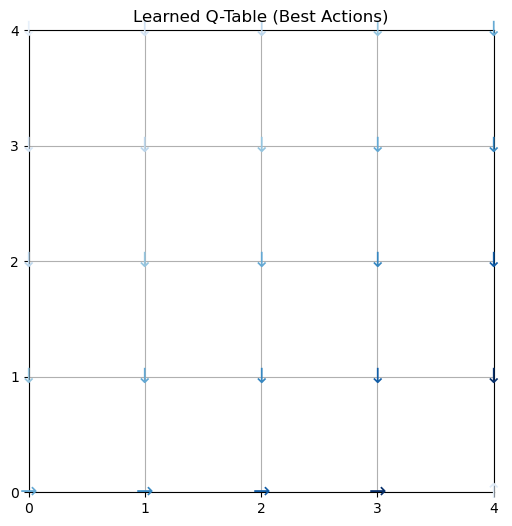

In [79]:
# Visualizing

import matplotlib.pyplot as plt

def plot_q_table(q_table):
    """Visualize the learned Q-values as a policy map"""
    size = q_table.shape[0]
    actions = ["↑", "↓", "←", "→"]
    fig, ax = plt.subplots(figsize=(6, 6))

    for x in range(size):
        for y in range(size):
            best_action = np.argmax(q_table[x, y])  # Best action at (x,y)
            q_values = q_table[x, y]

            # Color intensity based on max Q-value
            max_q = np.max(q_values)
            color_intensity = (max_q - np.min(q_table)) / (np.max(q_table) - np.min(q_table) + 1e-6)

            ax.text(y, size - 1 - x, actions[best_action], 
                    ha='center', va='center', fontsize=15, 
                    color=plt.cm.Blues(color_intensity))  # Arrow color
            
    ax.set_xticks(range(size))
    ax.set_yticks(range(size))
    ax.set_xticklabels(range(size))
    ax.set_yticklabels(range(size))
    ax.set_title("Learned Q-Table (Best Actions)")
    ax.grid(True)
    plt.show()

# Plot the Q-table after training
plot_q_table(agent.q_table)


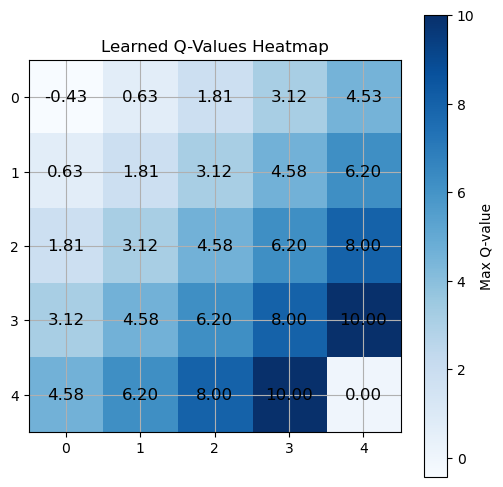

In [80]:
import matplotlib.pyplot as plt
import numpy as np

def plot_q_heatmap(q_table):
    """Visualize the learned Q-values as a heatmap"""
    size = q_table.shape[0]
    max_q_values = np.max(q_table, axis=2)  # Take max Q-value at each state

    plt.figure(figsize=(6, 6))
    plt.imshow(max_q_values, cmap='Blues', origin='upper')  # Heatmap
    
    # Add text labels
    for x in range(size):
        for y in range(size):
            plt.text(y, x, f"{max_q_values[x, y]:.2f}", 
                     ha='center', va='center', color='black', fontsize=12)
    
    plt.xticks(range(size))
    plt.yticks(range(size))
    plt.colorbar(label="Max Q-value")  # Show color scale
    plt.title("Learned Q-Values Heatmap")
    plt.grid(True)
    plt.show()

# Plot the Q-table after training
plot_q_heatmap(agent.q_table)
